## Question 1: Extracting Tesla Stock Data Using yfinance (2 Points)
You need to extract Tesla stock data using yfinance.

In [1]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Show first few rows of data
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping (1 Point)
You need to scrape Tesla revenue data from a financial website using BeautifulSoup.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url)

bs = BeautifulSoup(html_data.content, "html.parser")

tesla_revenue = pd.DataFrame( columns = ['Date', 'Revenue'])
table = bs.find_all("tbody")[1]
for row in table.find_all("tr"): 
    cells = row.find_all("td")
    date = cells[0].text
    revenue = cells[1].text
    revenue_line = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    tesla_revenue = pd.concat([tesla_revenue, revenue_line], ignore_index = True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Extracting GameStop Stock Data Using yfinance (2 Points)

In [3]:
# Download GameStop stock data using yfinance
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Show the first few rows of data
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Yearly Revenue Using yfinance (1 Point)

In [4]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url)

bs = BeautifulSoup(html_data.content, "html.parser")

gme_revenue = pd.DataFrame( columns = ['Date', 'Revenue'])
table = bs.find_all("tbody")[1]
for row in table.find_all("tr"): 
    cells = row.find_all("td")
    date = cells[0].text
    revenue = cells[1].text
    revenue_line = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    gme_revenue = pd.concat([gme_revenue, revenue_line], ignore_index = True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Tesla Stock and Revenue Dashboard (2 Points)

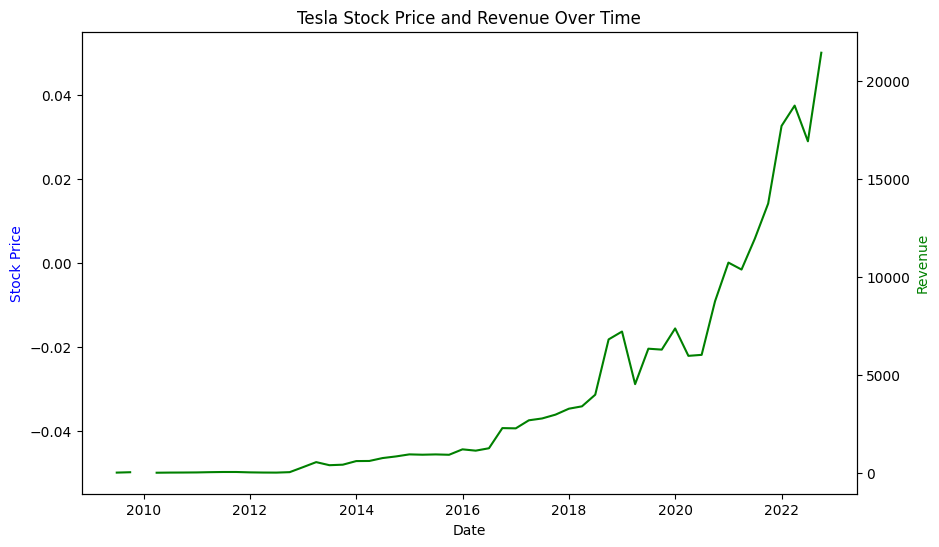

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Step 1: Scrape Tesla revenue data
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_revenue = requests.get(url_revenue)

# Parse the HTML using BeautifulSoup
soup_revenue = BeautifulSoup(html_revenue.content, "html.parser")

# Create an empty DataFrame for Tesla revenue data
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Extract data from the table
table_revenue = soup_revenue.find_all("tbody")[1]
for row in table_revenue.find_all("tr"):
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip().replace('$', '').replace(',', '')
    revenue_line = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    tesla_revenue = pd.concat([tesla_revenue, revenue_line], ignore_index=True)

# Clean the revenue data
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 2: Scrape Tesla stock data
url_stock = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_stock = requests.get(url_stock)

# Parse the HTML for stock data
soup_stock = BeautifulSoup(html_stock.content, "html.parser")

# Create an empty DataFrame for Tesla stock data
tesla_stock = pd.DataFrame(columns=["Date", "Close"])

# Extract stock data from the relevant table
table_stock = soup_stock.find_all("tbody")[0]
for row in table_stock.find_all("tr"):
    cells = row.find_all("td")
    date = cells[0].text.strip()
    close = cells[1].text.strip().replace(',', '')
    stock_line = pd.DataFrame([{"Date": date, "Close": close}])
    tesla_stock = pd.concat([tesla_stock, stock_line], ignore_index=True)

# Clean Tesla stock data
tesla_stock["Close"] = pd.to_numeric(tesla_stock["Close"], errors='coerce')
tesla_stock["Date"] = pd.to_datetime(tesla_stock["Date"])

# Step 3: Plot Tesla stock and revenue graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot stock prices
ax1.plot(tesla_stock['Date'], tesla_stock['Close'], color='b', label='Tesla Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Create second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='g', label='Tesla Revenue')
ax2.set_ylabel('Revenue', color='g')

# Set the title
plt.title('Tesla Stock Price and Revenue Over Time')
plt.show()


## Question 6: GameStop Stock and Revenue Dashboard (2 Points)

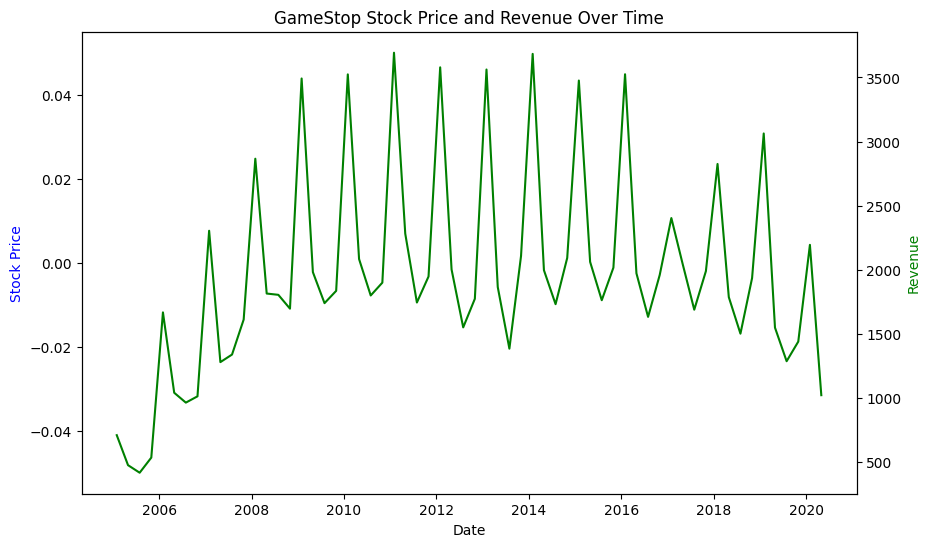

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Step 1: Scrape GameStop revenue data
url_revenue_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_revenue_gme = requests.get(url_revenue_gme)

# Parse the HTML using BeautifulSoup
soup_revenue_gme = BeautifulSoup(html_revenue_gme.content, "html.parser")

# Create an empty DataFrame for GameStop revenue data
gamestop_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Extract data from the table
table_revenue_gme = soup_revenue_gme.find_all("tbody")[1]
for row in table_revenue_gme.find_all("tr"):
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip().replace('$', '').replace(',', '')
    revenue_line_gme = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    gamestop_revenue = pd.concat([gamestop_revenue, revenue_line_gme], ignore_index=True)

# Clean the revenue data
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"])

# Step 2: Scrape GameStop stock data
url_stock_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_stock_gme = requests.get(url_stock_gme)

# Parse the HTML for stock data
soup_stock_gme = BeautifulSoup(html_stock_gme.content, "html.parser")

# Create an empty DataFrame for GameStop stock data
gamestop_stock = pd.DataFrame(columns=["Date", "Close"])

# Extract stock data from the relevant table
table_stock_gme = soup_stock_gme.find_all("tbody")[0]
for row in table_stock_gme.find_all("tr"):
    cells = row.find_all("td")
    date = cells[0].text.strip()
    close = cells[1].text.strip().replace(',', '')
    stock_line_gme = pd.DataFrame([{"Date": date, "Close": close}])
    gamestop_stock = pd.concat([gamestop_stock, stock_line_gme], ignore_index=True)

# Clean GameStop stock data
gamestop_stock["Close"] = pd.to_numeric(gamestop_stock["Close"], errors='coerce')
gamestop_stock["Date"] = pd.to_datetime(gamestop_stock["Date"])

# Step 3: Plot GameStop stock and revenue graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot stock prices
ax1.plot(gamestop_stock['Date'], gamestop_stock['Close'], color='b', label='GameStop Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Create second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], color='g', label='GameStop Revenue')
ax2.set_ylabel('Revenue', color='g')

# Set the title
plt.title('GameStop Stock Price and Revenue Over Time')
plt.show()
